# Lesson - Transforming Data with Pandas

In this lesson, we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.
It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.
We can find the data (here)[https://www.kaggle.com/unsdsn/world-happiness].

We'll explore the following functions and methods to perform this task:

`Series.map()`
`Series.apply()`
`DataFrame.applymap()`
`DataFrame.apply()`
`pd.melt()`

In [1]:
import numpy as np
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2015['Year']=2015 #adding 'Year' column to all dataframes
happiness2016['Year']=2016
happiness2017['Year']=2017

In [2]:
print(happiness2015.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [3]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015=happiness2015.rename(columns=mapping)#Renaming some columns

### Apply a Function Element wise using `map()` and `apply()` Functions

In [4]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_impact_map=happiness2015["Economy"].map(label)
economy_impact_apply=happiness2015["Economy"].apply(label)
equal=economy_impact_map.equals(economy_impact_apply)
print(equal)

True


In [5]:
def label(element,x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label,x=0.8)
print(economy_impact_apply)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object


### Apply a Function Element-wise to Multiple Columns Using `Applymap Method`

In [6]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact=happiness2015[factors].applymap(label)
print(factors_impact)

    Economy Family Health Freedom Trust Generosity
0      High   High    Low     Low   Low        Low
1      High   High    Low     Low   Low        Low
2      High   High    Low     Low   Low        Low
3      High   High    Low     Low   Low        Low
4      High   High    Low     Low   Low        Low
..      ...    ...    ...     ...   ...        ...
153     Low    Low    Low     Low   Low        Low
154     Low    Low    Low     Low   Low        Low
155     Low    Low    Low     Low   Low        Low
156     Low    Low    Low     Low   Low        Low
157     Low    Low    Low     Low   Low        Low

[158 rows x 6 columns]


### Apply Functions along an Axis using the Apply Method using `df.apply`

In [7]:
def v_counts(col):
    num=col.value_counts()
    den=col.size
    pct=num/den
    return pct
v_counts_pct=factors_impact.apply(v_counts)
print(v_counts_pct) 

       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In [8]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

Happiness Score  Factors Sum
0            7.587      7.58696
1            7.561      7.56092
2            7.527      7.52708
3            7.522      7.52222
4            7.427      7.42694

In [9]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages(col):
    div=col/happiness2015["Happiness Score"]
    pct=div*100
    return pct
factor_percentages=happiness2015[factors].apply(percentages)
print(factor_percentages)

       Economy     Family     Health    Freedom      Trust  Generosity  \
0    18.406617  17.787136  12.408462   8.772506   5.532885    3.911691   
1    17.224177  18.545563  12.535908   8.315963   1.870784    5.770401   
2    17.609672  18.075993  11.620035   8.627342   6.424472    4.535539   
3    19.396437  17.694097  11.768280   8.903616   4.852832    4.613002   
4    17.857681  17.808132  12.193753   8.522553   4.437458    6.168170   
..         ...        ...        ...        ...        ...         ...   
153   6.409235  22.329004  12.370563  17.085426  15.928139    6.530447   
154   8.582335  10.594611   9.553892  14.505988   2.398204    5.467066   
155  22.062542  15.798071  24.016301   5.217565   6.289421   15.694943   
156   0.526678  14.315663   7.709466   4.079174   3.463683    6.790706   
157   7.350476   4.929553  10.018669  12.840085   3.779852    5.875660   

     Dystopia Residual  
0            33.180177  
1            35.736146  
2            33.108011  
3          

### Reshaping Data with the `pd.melt()` Function

In [10]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt=pd.melt(happiness2015,id_vars=main_cols,value_vars=factors)
val_pct=(melt["value"]/melt["Happiness Score"])*100
val_pct=(melt["value"]/melt["Happiness Score"])*100
Percentage=round(val_pct,2)
melt["Percentage"]=Percentage
print(melt.head())

       Country          Region  Happiness Rank  Happiness Score variable  \
0  Switzerland  Western Europe               1            7.587  Economy   
1      Iceland  Western Europe               2            7.561  Economy   
2      Denmark  Western Europe               3            7.527  Economy   
3       Norway  Western Europe               4            7.522  Economy   
4       Canada   North America               5            7.427  Economy   

     value  Percentage  
0  1.39651       18.41  
1  1.30232       17.22  
2  1.32548       17.61  
3  1.45900       19.40  
4  1.32629       17.86  


### Aggregating and Ploting
We refer to data in the above format as tidy data. We can learn more about the tidy format (here)[https://www.jstatsoft.org/article/view/v059i10].

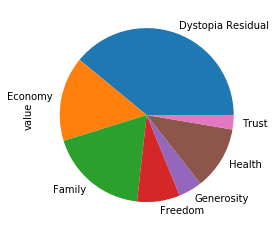

In [11]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)

In this lesson, we learned how to transform data using the Series.map(), Series.apply(), DataFrame.apply(), and DataFrame.applymap() methods along with the pd.melt() function. Below is a summary chart of the differences between the map(), apply(), and applymap() methods:

Method
Series or Dataframe Method	Applies Functions Element-wise?
Map	Series	Yes
Apply	Series	Yes
Applymap	Dataframe	Yes
Apply	Dataframe	No, applies functions along an axis

As we explore pandas, we'll also find that pandas has a method to `"un-melt"` the data, or transform rows into columns. This method is called the `df.pivot()` method, not to be confused with the `df.pivot_table()` method used to aggregate data. 